<a href="https://colab.research.google.com/github/laaledesiempre/machine_learning_PW/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Librerias de visualizacion y proceso de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Herramientas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [24]:
!wget --quiet https://raw.githubusercontent.com/laaledesiempre/machine_learning_PW/main/archive.zip #Contiene la flag quiet para que no de output

In [4]:
!unzip archive.zip #Descomprimimos el Zip

Archive:  archive.zip
  inflating: water_potability.csv    


---
# Dataset

Para este trabajo utilizaremos un dataset sobre la potabilidad del agua, que toma ciertos parametros para determinar si el agua es o no apta para consumo.

In [8]:
dt = pd.read_csv("./water_potability.csv")

In [22]:
dt.head(5) # Un pequeño ejemplo del dataset

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [11]:
dt.info() # Algunos datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
dt.describe() # y estadisticas

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

> Como podemos ver, en el dataset tenemos datos nulos, asi se ve la proporcion de datos sin filtrar

<Axes: >

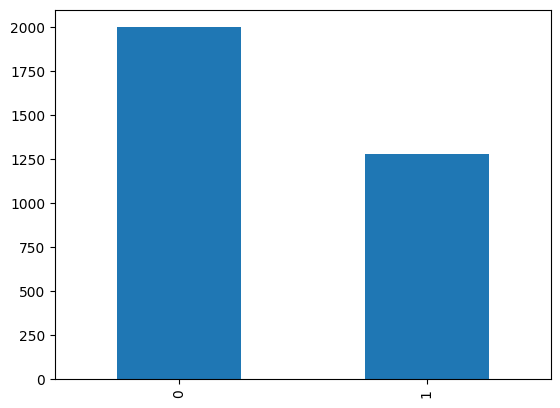

In [19]:
dt['Potability'].value_counts().plot(kind="bar")

> Y **asi** con los datos filtrados

<Axes: >

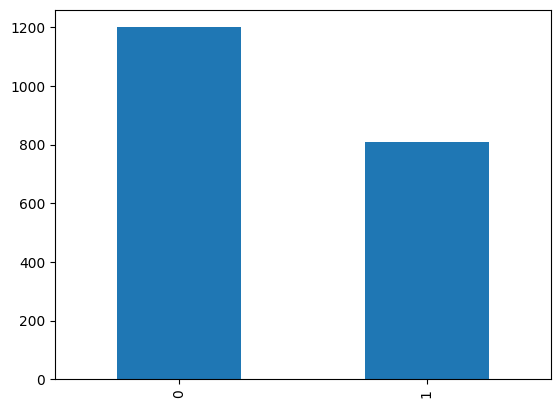

In [23]:
dt.dropna()['Potability'].value_counts().plot(kind="bar")

Vamos a redefinir dt con estos datos limpios

In [25]:
dt = dt.dropna()
dt.info() # Ahora deberia haber misma cantidad de not nulls en todos c:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


> Vamos a ver las relaciones para evaluar la reelevancia de los datos a simple vista y empezar a sacar concluciones.

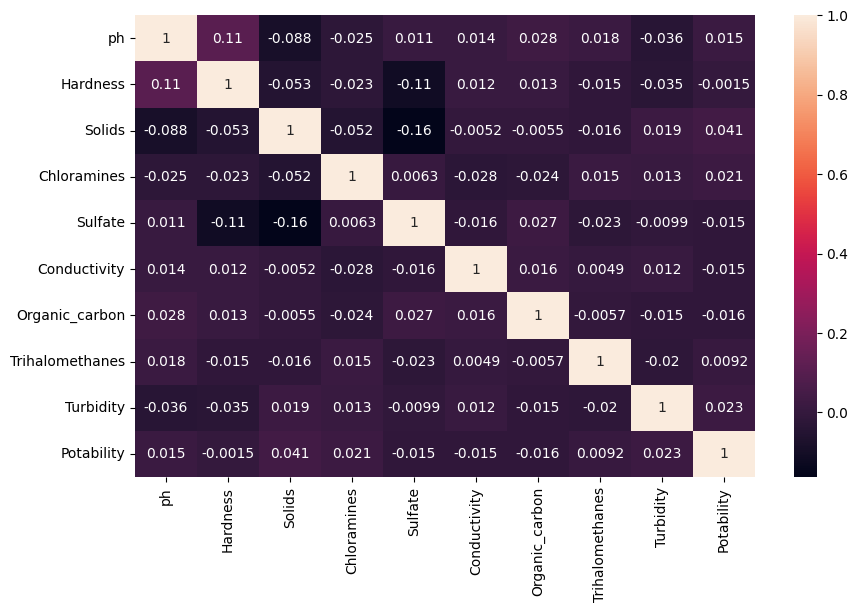

In [26]:
sns.heatmap(data=dt.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Que conclusiones podemos extraer de este mapa de calor?
---
Pareciera que todos los datos tienen relaciones **similares**, esto podria significar que todos tienen una reelevancia similar, no parece haber algun dato con poca coorelacion con todos, solo casos aislados como el del sulfato con solidos y con la dureza del agua. o los solidos y el ph.

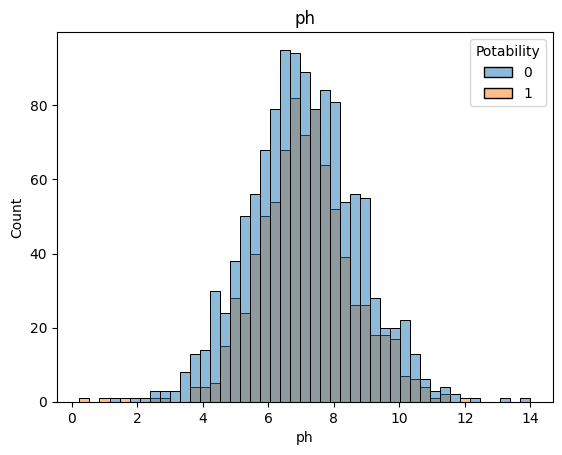

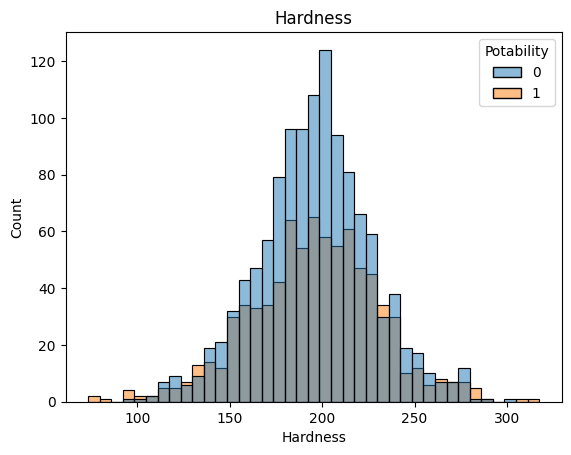

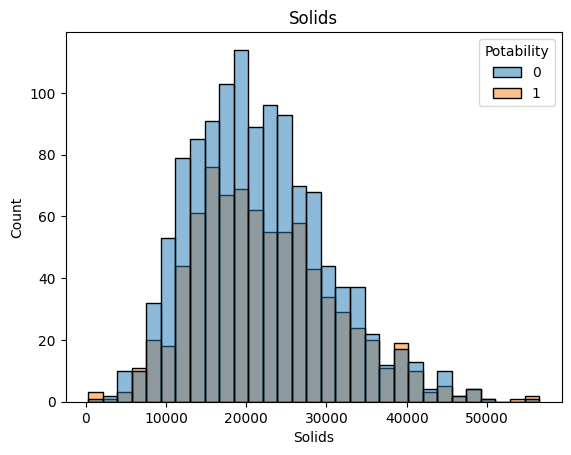

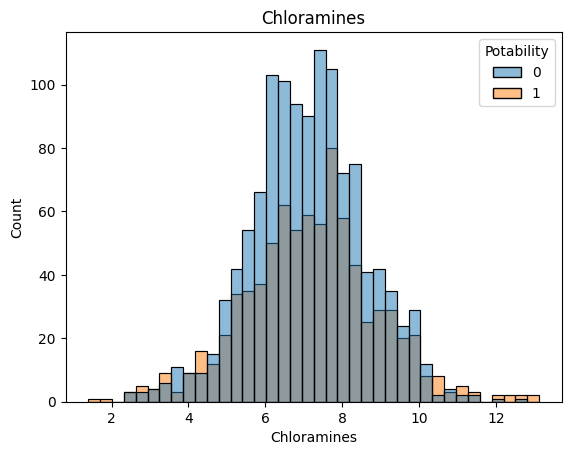

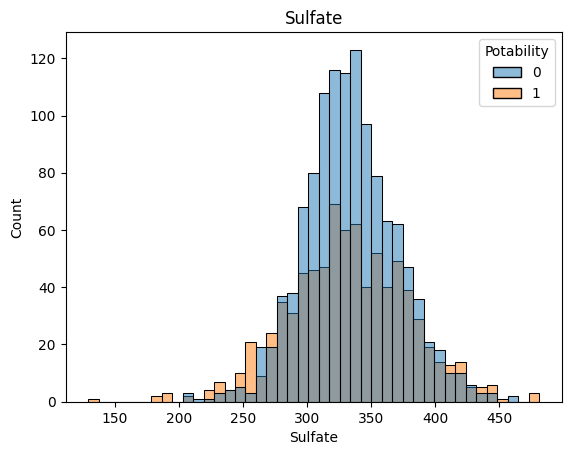

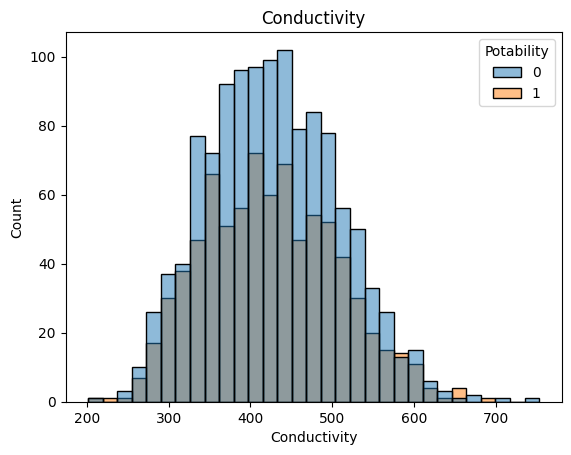

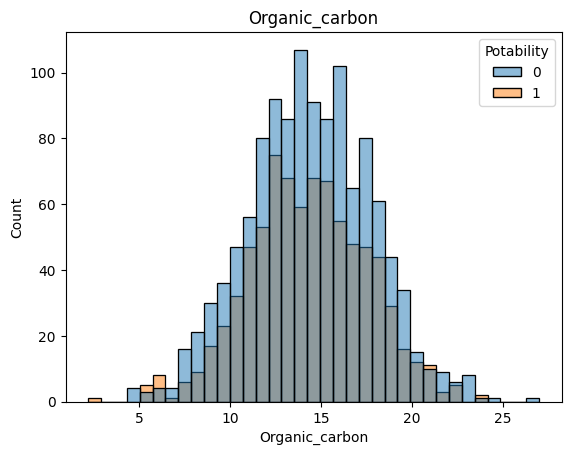

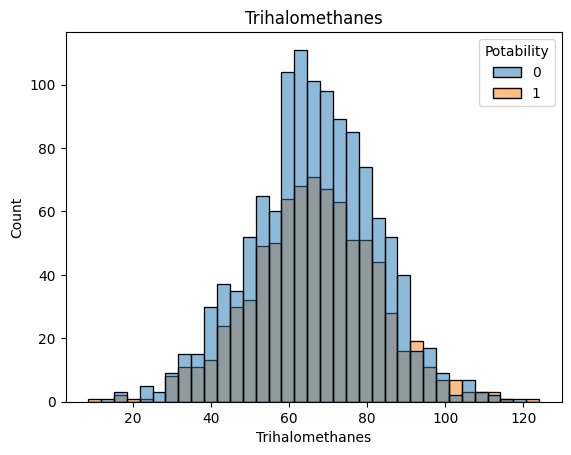

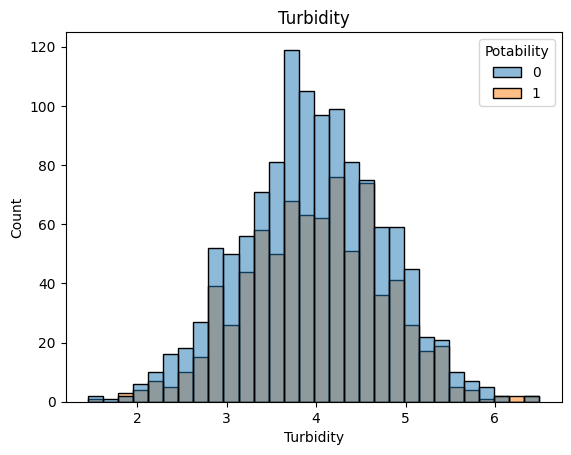

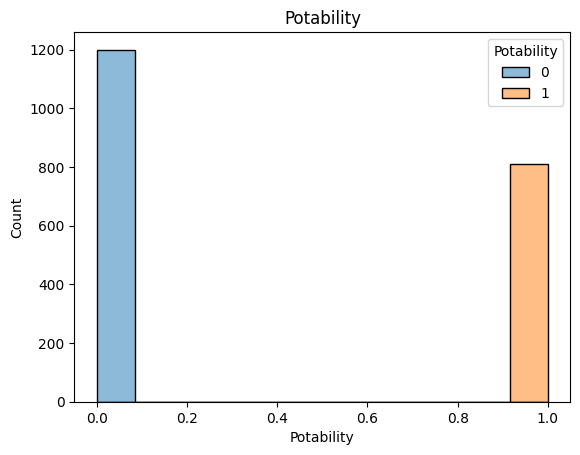

In [27]:
for col in dt.columns:
    plt.title(col)
    sns.histplot(data=dt, x = col, hue='Potability')
    plt.show()

> Estas graficas de distribucion son interesantes, la forma de campana de Gauss indica que la mayoria de los datos tiene una distribucion similar, y casos extremos mas aislados, un analisis que se podria hacer a futuro es si los casos mas extremos son verdaderamente reelevantes, ya que son pocos, y bastante distribuidos entre potabilidad y no potabilidad.

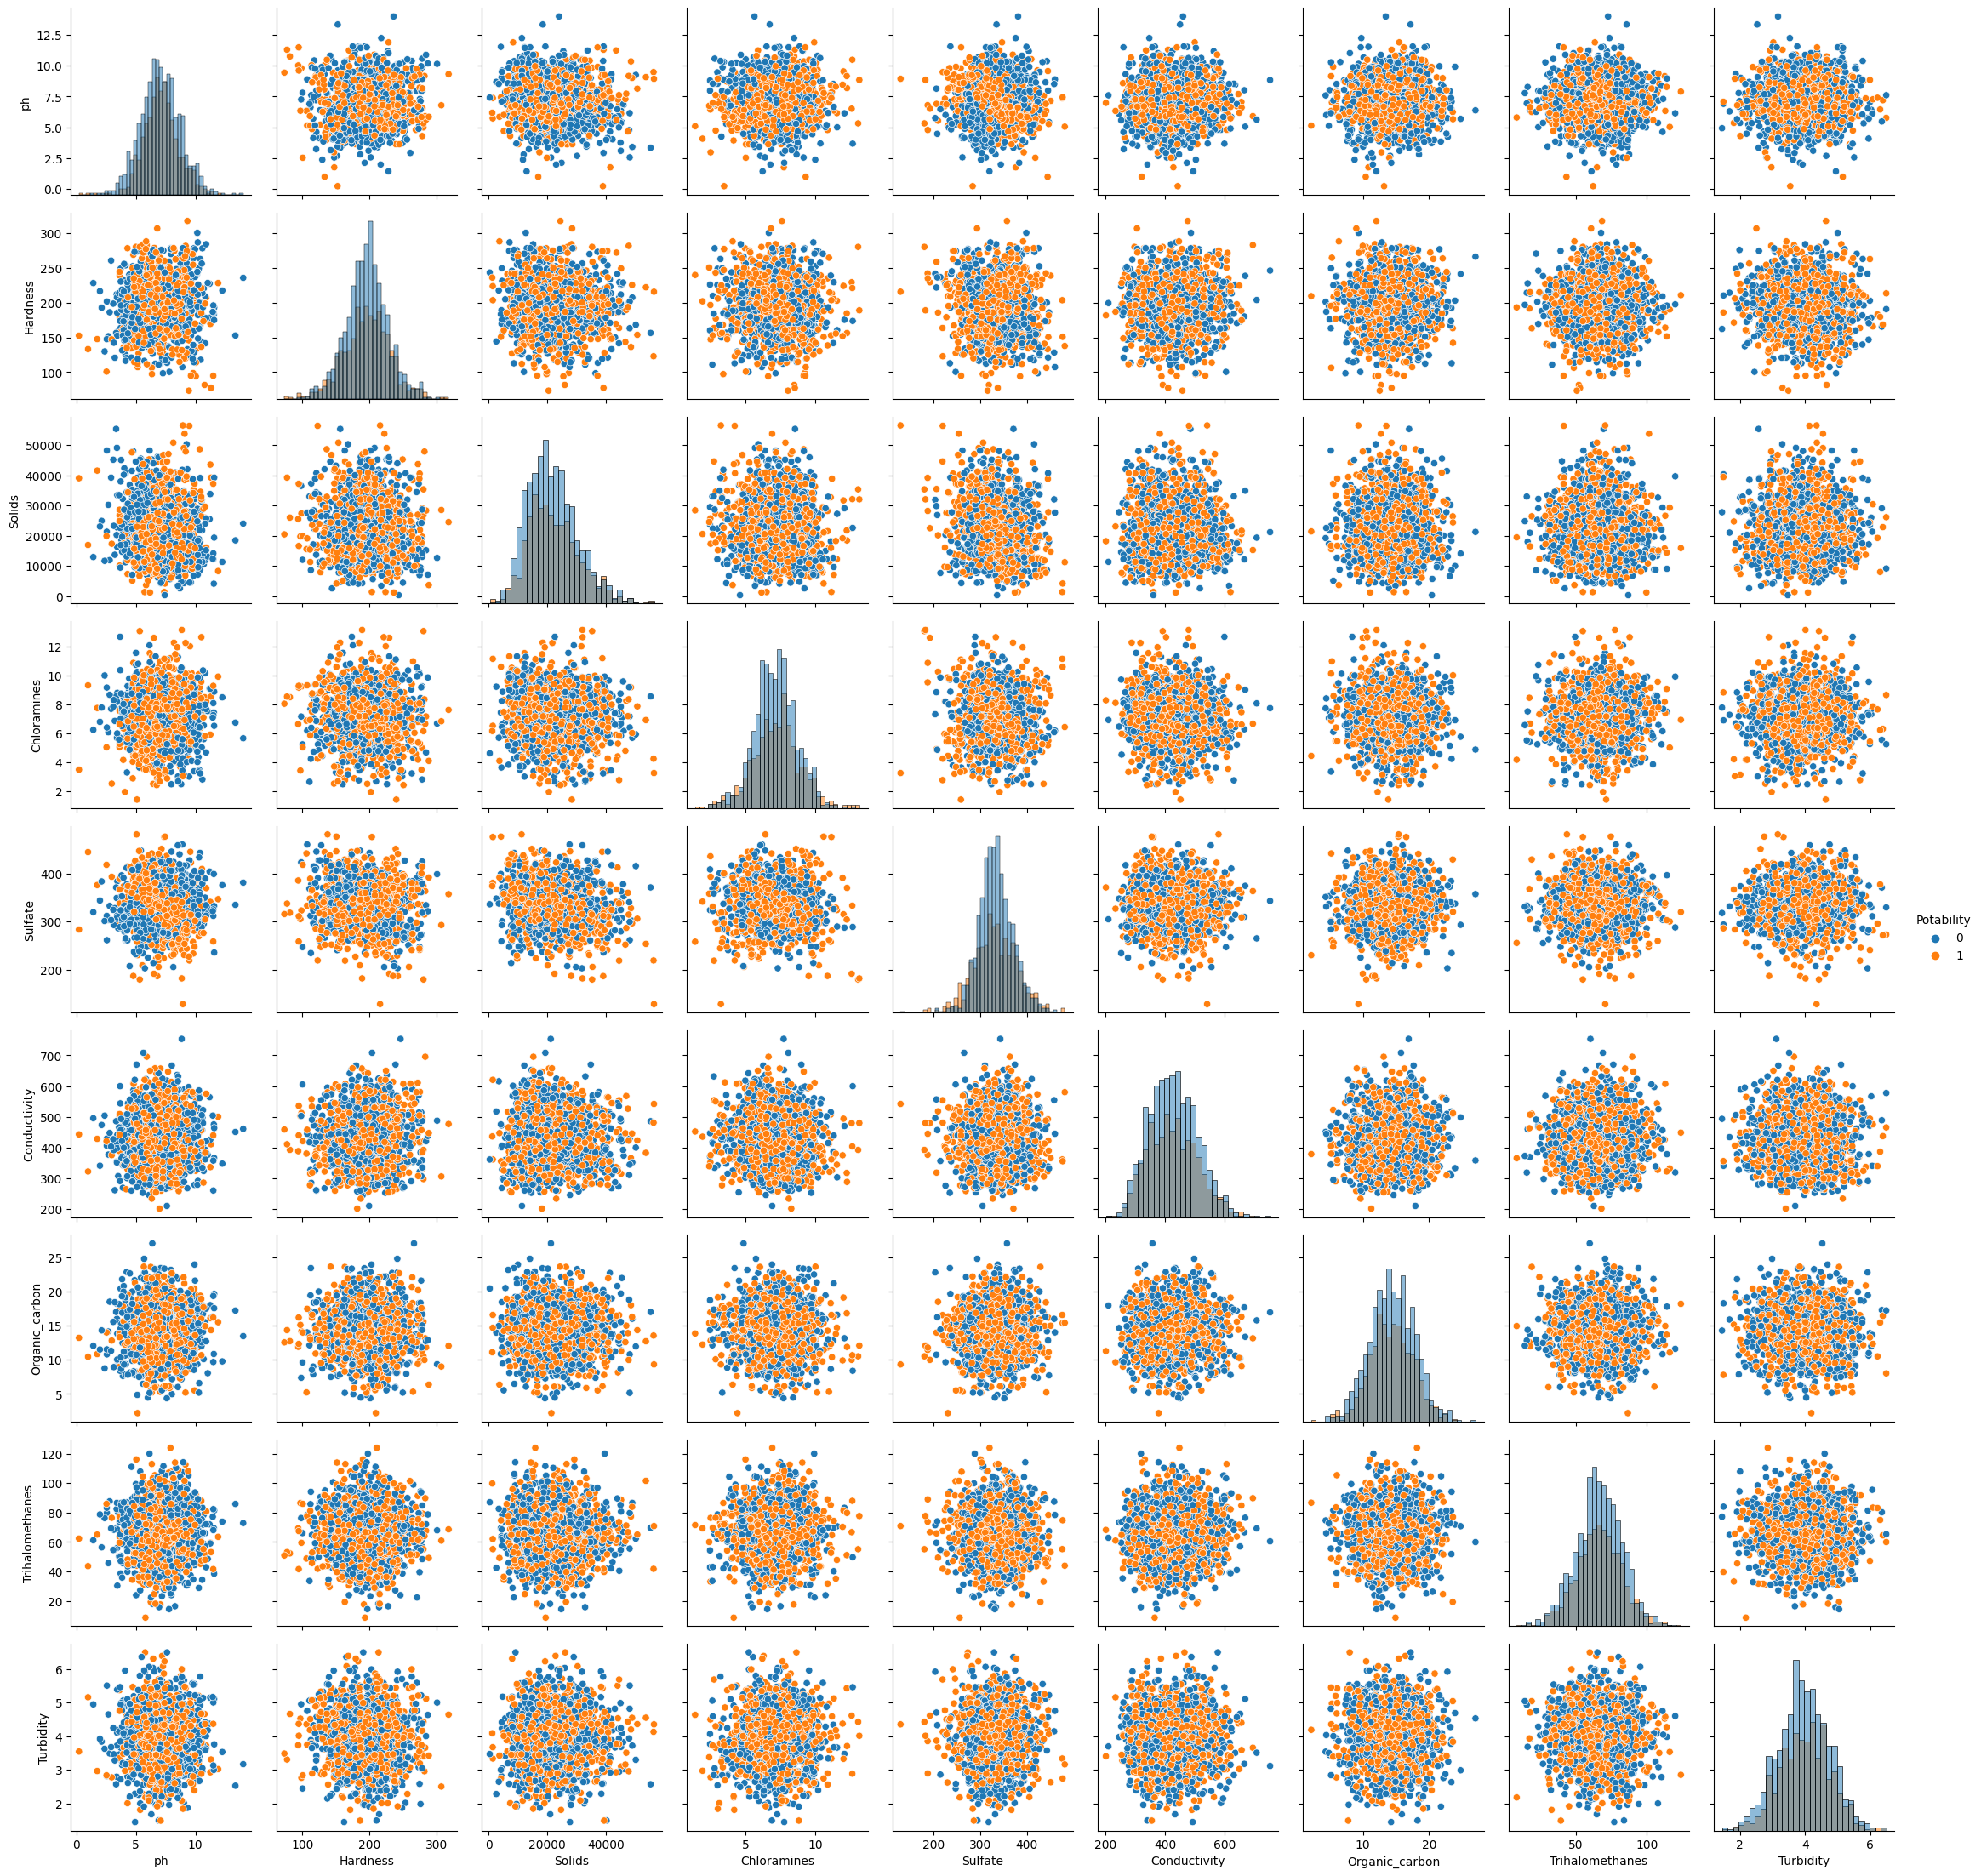

In [28]:
g = sns.PairGrid(dt, hue="Potability") # tarda mucho y no tiene reelevancia su ejecusion, podria interesarle no ejecutarlo
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

> Este grafico refuerza bastante la idea de que es bastante distribuida y similar la relacion de datos, todos los graficos se centran en puntos medios y no en extremos a excepcion de casos particulares, y no se ve una posicion clara respecto a donde se encuntran los potables y los no potables en la mayoria de graficos. no se encuentrar muy segregados en la mayoria de las comparaciones.

---
# Finalizada la exploracion de datos, vamos a prepararlos
---

In [45]:
print(dt.head())
y = dt.pop('Potability') #aca sacamos la potabilidad
print(dt.head())
# Ahora tenemos guardado en Y los resultados
y


          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
5        8.399735        54.917862   2.559708  
6       13.789695        84.603556   2.672989  
7       12.363817        62.798309   4.401425  
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
print(y.shape)
print(dt.shape)
print(f"y{y.shape} y dt{dt.shape} tienen la misma cantidad de filas pero diferente cantidad de columnas") if y.shape[0] == dt.shape[0] else print("NO tienen la misma cantidad de filas")

(2011,)
(2011, 9)
y(2011,) y dt(2011, 9) tienen la misma cantidad de filas pero diferente cantidad de columnas


In [55]:
X = np.asarray(dt) # Convertimos dt en un array de numpy para crear los datos
print(X)

[[8.31676588e+00 2.14373394e+02 2.20184174e+04 ... 1.84365245e+01
  1.00341674e+02 4.62877054e+00]
 [9.09222346e+00 1.81101509e+02 1.79789863e+04 ... 1.15582794e+01
  3.19979927e+01 4.07507543e+00]
 [5.58408664e+00 1.88313324e+02 2.87486877e+04 ... 8.39973464e+00
  5.49178618e+01 2.55970823e+00]
 ...
 [1.14910109e+01 9.48125452e+01 3.71888260e+04 ... 1.61727554e+01
  4.15585007e+01 4.36926431e+00]
 [6.06961576e+00 1.86659040e+02 2.61387802e+04 ... 1.20676196e+01
  6.04199211e+01 3.66971170e+00]
 [4.66810169e+00 1.93681735e+02 4.75809916e+04 ... 1.38944185e+01
  6.66876948e+01 4.43582091e+00]]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [57]:
X_train.shape

(1809, 9)

In [58]:
X_test.shape

(202, 9)

In [59]:
y_train.shape

(1809,)

In [60]:
y_test.shape

(202,)

## Empezando a probar modelos:
---
> ### 1) Regresion Logica

In [63]:
# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

In [61]:
# Modelos para clasificación
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()    # Se instancia el modelo, parámetros por defecto
modelo_lr.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.

pred_lr = modelo_lr.predict(X_test)   # Con la Entrada para test, se evalúa la predicción de Clase del modelo

In [64]:
print("Reporte de Clasificación: \n", classification_report(y_test, pred_lr))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       127
           1       0.00      0.00      0.00        75

    accuracy                           0.63       202
   macro avg       0.31      0.50      0.39       202
weighted avg       0.40      0.63      0.49       202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


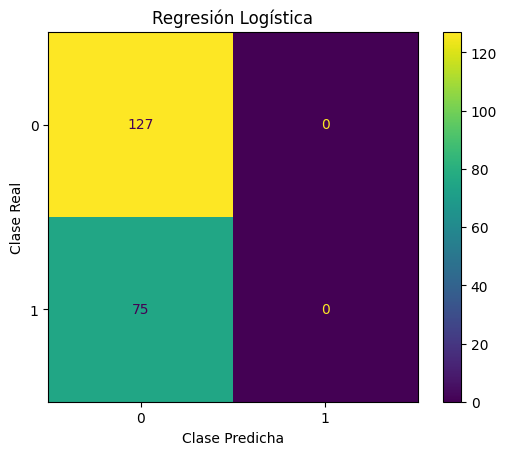

In [66]:

def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)


plot_confusion_matrix(y_test, pred_lr, model_name="Regresión Logística")

> Con la regresion logica, automaticamente nos dio todos como si fueran no potables, vamos a analizar si esto es debido a que no es el modelo idoneo, o si es por que los datos no son idoneos para clasificacion

In [67]:
print(pred_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


---
# Arbol ecologico
---


In [68]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       127
           1       0.53      0.56      0.54        75

    accuracy                           0.65       202
   macro avg       0.63      0.63      0.63       202
weighted avg       0.65      0.65      0.65       202



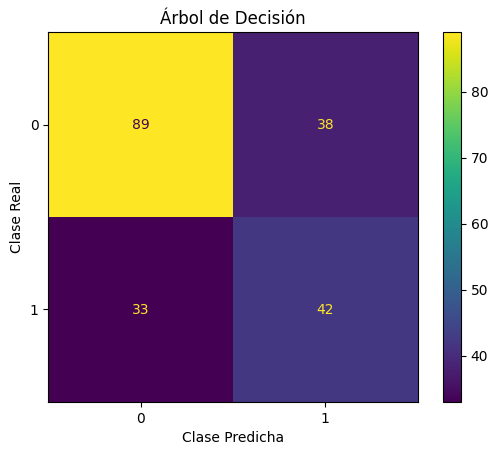

In [70]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, model_name="Árbol de Decisión")

> Genial, podemos ver una mejora, pero, sigue habiendo una gran cantidad de errores, aun asi, parece ir muchisimo mejor!

In [77]:
tree_clf.feature_importances_ # Importancia de cada valor

0.13935059766562471

In [74]:
dt.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [91]:
# Aca podemos ver un dataframe con la importancia de cada uno
pd.DataFrame(data=tree_importance_data).sort_values(by="importance", ascending=False)

label  importance
1         Hardness    0.151162
4          Sulfate    0.142789
0               ph    0.139351
3      Chloramines    0.135353
8        Turbidity    0.097798
2           Solids    0.089791
6   Organic_carbon    0.084816
7  Trihalomethanes    0.079909
5     Conductivity    0.079030